# Correlations and Principal Component Analysis

In pre-processing, we want to study how different features relate to eachother, known as their correlation. Correlation looks at the simultaneous fluctuations in both or all variables measured. A high correlation indicates the variables tend to move in tandem. 

Importance in Machine Learning:
* Feature Selection: Highly correlated features provide redundant information. We want to select a minimal set of important features that best represent the target variable. This prevents overfitting and improves a model's ability to generalise. 
* Reduce Bias: Ensures model fairness and avoids bias. 
* Multicollinearity: Occurs when two or more predictor variables in a model are highly linearly correlated. It can negatively impact models by increasing variance and making it difficult to determine the significance and effect of individual predictors. Mulitcollinearity is more problematic that correlation as it inflates standard errors, and undermines reliability of estimated coefficients. You can address multicolinearity with PCA or ridge regression to improve model stability and interpretability. 
* Interpretability and debugging: By analysing correlation between input features and output targets, researchers gain insights into which variables have the strongest impact on the models decisions. This helps ensure the model is actually learning meaningful patterns in the data rather than spurious correlations. 

## Correlations

### With pH being directly related to the acidity of the wine, we would expect direct correlations between a few of our variables, namely pH, fixed acidity, citric acid, and volatile acidity.  

In [1]:
import pandas as pd 
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt

df_R = pd.read_csv('/kaggle/input/wine-quality/winequality-red.csv', delimiter=";")
df_white = pd.read_csv('/kaggle/input/wine-quality/winequality-white.csv', delimiter=";")

df_red = df_R[["pH", "fixed acidity", "volatile acidity", "citric acid"]]

## Box Plots

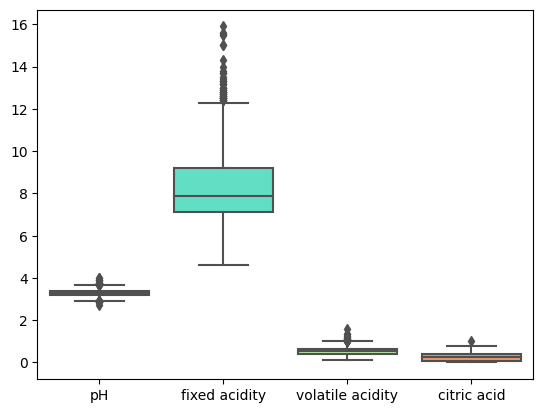

In [2]:
ax = sns.boxplot(data=df_red, orient='v', palette='rainbow')

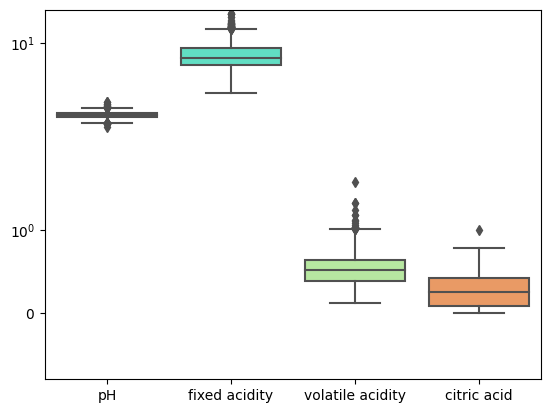

In [3]:
ax = sns.boxplot(data=df_red, orient='v', palette='rainbow')
ax.set_yscale('symlog')

## Heat Map

<Axes: >

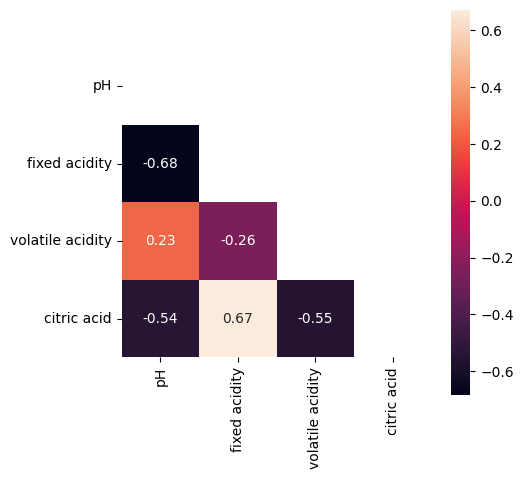

In [4]:
correlation = df_red.corr()
mask_triu = np.triu(correlation)
fig = plt.gcf()
fig.set_size_inches(5,5)
sns.heatmap(data=correlation, mask=mask_triu, square=True, annot=True)

## Joint Plots

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


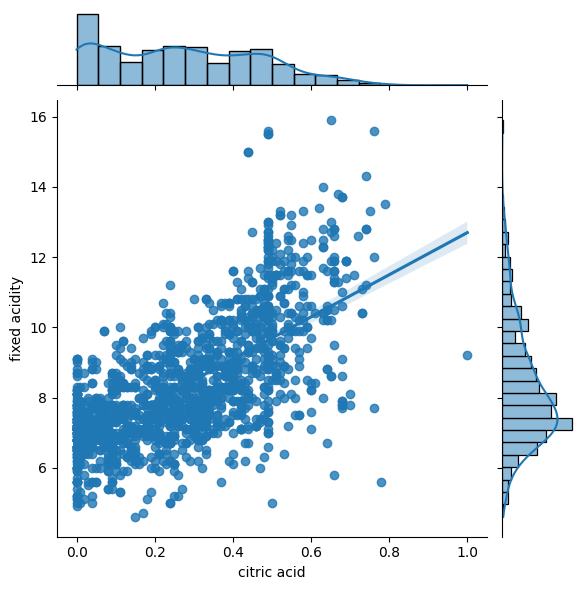

In [5]:
joint_plt = sns.jointplot(y='fixed acidity', x = 'citric acid', data=df_red, kind='reg')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


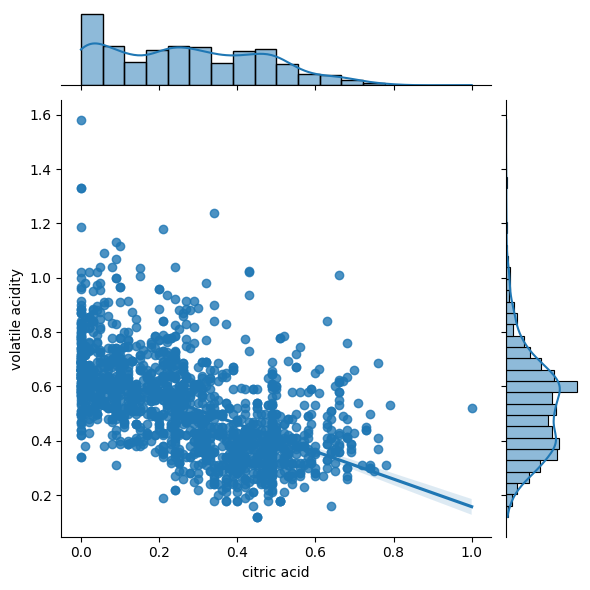

In [6]:
joint_plt = sns.jointplot(y='volatile acidity', x = 'citric acid', data=df_red, kind='reg')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


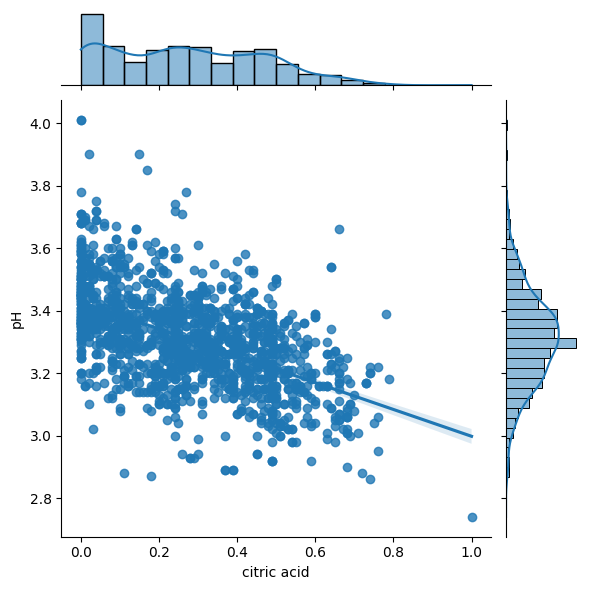

In [7]:
joint_plt = sns.jointplot(y='pH', x = 'citric acid', data=df_red, kind='reg')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


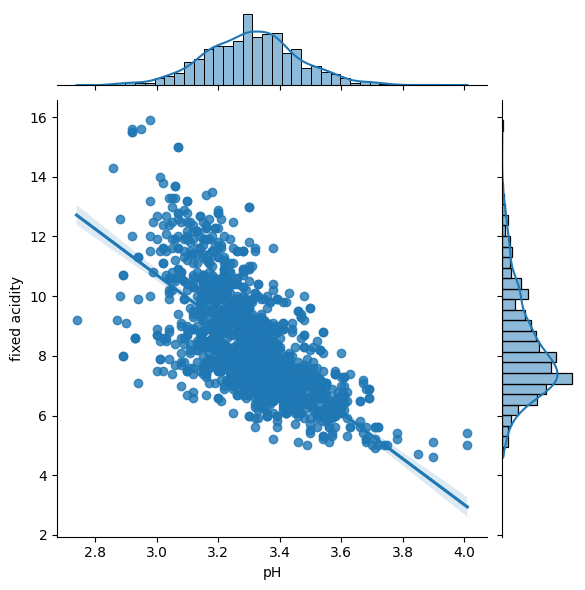

In [8]:
joint_plt = sns.jointplot(y='fixed acidity', x = 'pH', data=df_red, kind='reg')

## Discussion

# Principal Component Analysis

So you have identified correlations between multiple variables? What do you do?
Principal Component Analysis, simply put, is the method used to find the most important variables. 
It works by reducing the dimensionality of your dataset whilst maintaing all of your important information. It does this by transforming the original variables into a set of new, uncorrelated variables called principal components. \
Key Aspects: 
* Dimensionality reduction: Helps manage high dimensional datasets by extracting essential information and discarding less relevant features. 
* Data Exploration and Visualisation: Help uncover hidden patterns and insights. 
* Linear Transformation: Performs a linear transformation of data, seeking directions of maximum variance. 
* Feature Selection: Principal components are ranked by the variance they explain, allowing for effective feature selection. 
* Data Compression: PCA can compress data while preserving most of the original information. 
* Clustering and Classification: Reduce noise and highlight underlying structure. 

* Advantages: Offers linearity, computational efficiency, and scalability. 
* Limitations: Assumes data normality and linearity and may lead to information loss. 

What are principal components:
A principal component is a normalised linear combination of the original features in a data set. The first principle component is a linear combination of original predictor variables that captures the data sets maximum variance. It determines the direction of highest variability in the data. Larger the variability captured in the first component, larger the information captured by component. No other component can have a higher variability than this component. \
Second PC: Also a linear combination of the original predictors, which captures the remaining variance in the data set and is uncorrelated with the first PC. The two should be orthogonal. The remaining PCs will follow the same trend, all being orthogonal to their preceding PC. 

How does PCA work? 
1. Standardise the data 
2. Compute the covariance matrix 
3. Compute the eigenvectors and eigenvalues. 
4. Sort eigenvectors by eigenvalues
5. Choose PC's.  ( select the top k eigenvectors (PC's) where k is the desired dimensionality of the reduced dataset. 
6. Transform the data 

Why normalise? 
Using PCA on un-normalised data will lead to exponentially large loadings for variables with high variance. Leading to the dependence of a PC on the variable with high variance. 

In Machine Learning:
After we have performed PCA on the training set, we get another bunch of components on the testing set, then train the model. 
* Do not combine the train and test set to obtain PCA components of the whole data at once, as this would violate the assumption of generalisation since the test ddata would leak into the trainign set. 
* Do not perform PCA on test and train data sets separately as the resultant vectors from the train and test PCAs will have different directions. We want the train and test data to end with the same axis. 

I am now going to perform a PCA on the red and white wine datasets

In [9]:
df_R['wine'] = 'red'
df_white['wine'] = 'white'

df_wine = pd.concat([df_R, df_white], ignore_index=True)

df_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


### Normalise

In [10]:
data_pca = df_wine.copy()
data_pca = data_pca.drop(labels=['quality', 'wine'], axis = 1)
mean = data_pca.mean()
std = data_pca.std()
normalised_data_pca = (data_pca-mean)/std
normalised_data_pca

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.142462,2.188664,-2.192664,-0.744721,0.569914,-1.100055,-1.446247,1.034913,1.812950,0.193082,-0.915394
1,0.451001,3.281982,-2.192664,-0.597594,1.197883,-0.311296,-0.862402,0.701432,-0.115064,0.999502,-0.580023
2,0.451001,2.553104,-1.917405,-0.660648,1.026618,-0.874695,-1.092402,0.768128,0.258100,0.797897,-0.580023
3,3.073580,-0.362411,1.660957,-0.744721,0.541370,-0.762016,-0.986248,1.101609,-0.363840,0.327485,-0.580023
4,0.142462,2.188664,-2.192664,-0.744721,0.569914,-1.100055,-1.446247,1.034913,1.812950,0.193082,-0.915394
...,...,...,...,...,...,...,...,...,...,...,...
6492,-0.783154,-0.787590,-0.197039,-0.807775,-0.486215,-0.367636,-0.420095,-1.186069,0.320294,-0.210128,0.593772
6493,-0.474615,-0.119451,0.284664,0.537383,-0.257863,1.491582,0.924517,0.067819,-0.426034,-0.478935,-0.747709
6494,-0.551750,-0.605370,-0.885185,-0.891847,-0.429127,-0.029596,-0.083942,-0.719196,-1.421138,-0.478935,-0.915394
6495,-1.323097,-0.301671,-0.128224,-0.912866,-0.971463,-0.592996,-0.101635,-2.003097,0.755652,-1.016548,1.935253


### Transform to matrix

In [11]:
C = normalised_data_pca.to_numpy()
print(C)
print(C.shape)

[[ 0.1424623   2.18866446 -2.19266376 ...  1.81294997  0.19308191
  -0.91539371]
 [ 0.45100101  3.28198234 -2.19266376 ... -0.11506417  0.99950169
  -0.58002349]
 [ 0.45100101  2.55310376 -1.9174051  ...  0.25809985  0.79789675
  -0.58002349]
 ...
 [-0.5517498  -0.60537011 -0.88518515 ... -1.42113827 -0.47893457
  -0.91539371]
 [-1.32309658 -0.3016707  -0.12822384 ...  0.75565189 -1.01654776
   1.93525315]
 [-0.93742319 -0.78758975  0.42229346 ...  0.25809985 -1.41975765
   1.0968276 ]]
(6497, 11)


### Covariance Matrix

In [12]:
cV = np.cov(C.T)
cV.shape

(11, 11)

### Eigendecomposition of covariance matrix

In [13]:
values, vectors = np.linalg.eig(cV)
print(vectors)
print(values)

[[ 2.38798897e-01  3.36354536e-01 -4.34301304e-01 -3.34679266e-01
  -1.64346214e-01 -2.81267685e-01  3.44056674e-01  1.47480376e-01
   2.04553713e-01  4.01235645e-01 -2.83079440e-01]
 [ 3.80757499e-01  1.17549716e-01  3.07259420e-01 -8.47718098e-02
  -2.12784888e-01  1.52176731e-01 -4.96932675e-01 -1.51455988e-01
   4.92143072e-01 -8.74350885e-02 -3.89159756e-01]
 [-1.52388438e-01  1.83299403e-01 -5.90569674e-01  1.10895136e-03
   2.64300312e-01  2.34463340e-01 -4.02688676e-01  1.55348697e-01
  -2.27633798e-01 -2.93412336e-01 -3.81285036e-01]
 [-3.45919930e-01  3.29914181e-01  1.64688429e-01 -4.49765078e-01
  -1.67443015e-01 -1.37277329e-03  1.08003195e-01  3.53361853e-01
   2.33477754e-01 -5.24872935e-01  2.17975536e-01]
 [ 2.90112586e-01  3.15257992e-01  1.66791047e-02 -4.34375867e-02
   2.44743855e-01 -1.96630217e-01  2.96443716e-01 -6.14391068e-01
  -1.60976388e-01 -4.71516850e-01 -4.60681556e-02]
 [-4.30914008e-01  7.19325988e-02  1.34223949e-01  2.12535052e-04
   3.57278939e-01  

In [14]:
print(vectors.shape)
print(values.shape)

(11, 11)
(11,)


### Explained Variances

In [15]:
explained_variances = []
for i in range(len(values)):
    explained_variances.append(values[i] / np.sum(values))
    
print(np.sum(explained_variances))
print(explained_variances)

1.0000000000000002
[0.27544260441423407, 0.22671145702012377, 0.14148608664196233, 0.00298461838661589, 0.08823200715191011, 0.020699614950835284, 0.030638549581105002, 0.06544317417745887, 0.0552101555353744, 0.0455918445761046, 0.04755988756427567]


## Generating principal components
(projected_1, projected_2)

In [16]:
projected_1 = C.dot(vectors.T[0])
projected_2 = C.dot(vectors.T[1])
res = pd.DataFrame(projected_1, columns = ['PC1'])
res['PC2'] = projected_2
res['Y'] = df_wine['wine']
res

,PC1,PC2,Y
0,3.205749,0.416491,red
1,3.038817,1.107377,red
2,3.071657,0.878897,red
3,1.571141,2.112382,red
4,3.205749,0.416491,red
...,...,...,...
6492,0.062819,-1.934056,white
6493,-1.866845,0.524391,white
6494,-0.571089,-0.722606,white
6495,-0.090045,-3.545507,white


<Axes: xlabel='PC1', ylabel='PC2'>

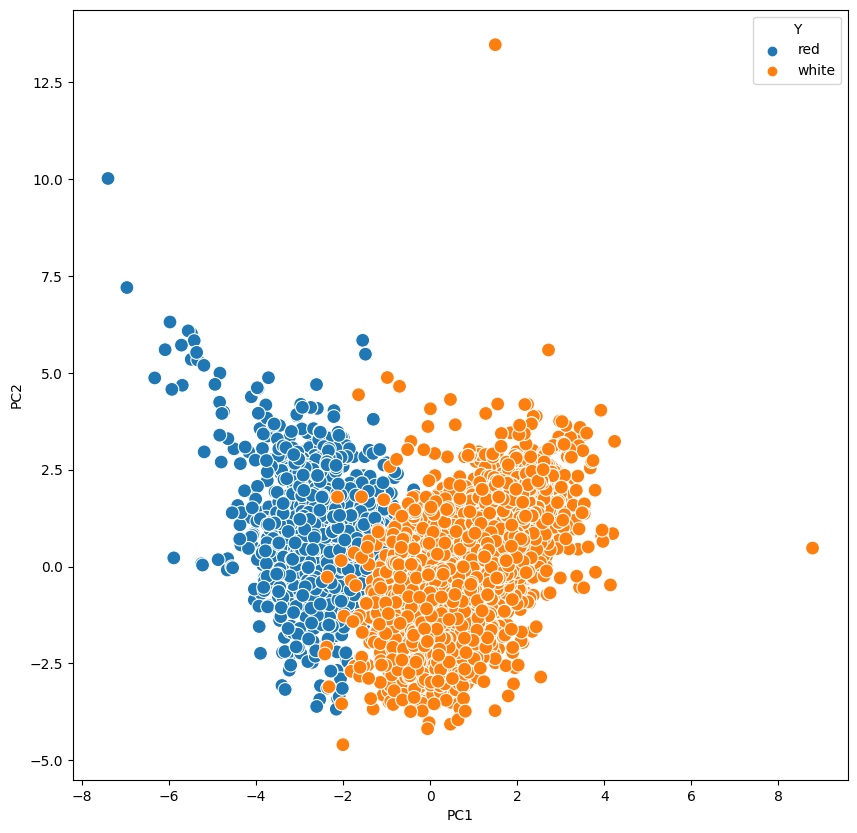

In [17]:
plt.figure(figsize=(10,10))
# sns.scatterplot(x=res['PC1'], y=res['PC2'] * len(res), hue=res['Y'], s=100)
sns.scatterplot(x=-res['PC1'], y=res['PC2'], hue=res['Y'], s=100)